In [1]:
%matplotlib inline
import pandas as pd

In [2]:
train_sample = pd.read_csv('../data/train_sample.csv')

In [3]:
train_sample.shape

(100000, 8)

In [4]:
train_sample.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [5]:
train_sample.sample(5)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
48548,7057,28,1,25,135,2017-11-09 04:10:56,NaN,0
24476,284086,64,1,12,459,2017-11-08 14:07:09,NaN,0
41453,28742,14,1,19,489,2017-11-09 14:31:24,NaN,0
31372,742,18,1,37,134,2017-11-07 10:05:52,NaN,0
90588,169080,18,1,10,439,2017-11-08 14:05:00,NaN,0


In [6]:
train_sample.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [7]:
train_sample.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [2]:
train = pd.read_csv('../data/train.csv')

In [3]:
test = pd.read_csv('../data/test.csv')

In [9]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [10]:
train.shape

(184903890, 8)

In [12]:
train.ip.nunique()

277396

In [15]:
train.loc[train.attributed_time.notnull(), 'is_attributed'].value_counts()

1    456846
Name: is_attributed, dtype: int64

In [16]:
train.is_attributed.value_counts()

0    184447044
1       456846
Name: is_attributed, dtype: int64

attributed_time is probably useless as in all cases it coexist with app installation

In [4]:
sub83230 = train.loc[train.ip == 83230]

In [5]:
sub83230.device.value_counts()

1       25477
2         123
0          60
3866       13
3543       11
5           5
3032        4
59          3
33          3
116         3
558         2
9           2
25          2
7           1
141         1
6           1
154         1
67          1
251         1
745         1
76          1
1184        1
1120        1
53          1
Name: device, dtype: int64

In [32]:
sub83230.loc[:, 'device_os'] = sub83230.device.apply(lambda x: str(x)) + '_' + sub83230.os.apply(lambda x: str(x))

/home/fei/miniconda3/envs/py3_5/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/fei/miniconda3/envs/py3_5/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
sub83230.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,device_os
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,1_13
24831,83230,2,1,3,477,2017-11-06 16:00:31,NaN,0,1_3
43179,83230,12,1,13,178,2017-11-06 16:00:48,NaN,0,1_13
44757,83230,9,1,13,134,2017-11-06 16:00:50,NaN,0,1_13
51216,83230,2,1,19,237,2017-11-06 16:00:56,NaN,0,1_19


In [34]:
sub83230.loc[sub83230.is_attributed == 1, 'device_os'].value_counts(normalize=True)

1_13      0.186047
1_19      0.162791
0_24      0.116279
1_18      0.069767
0_0       0.046512
1_15      0.046512
1_22      0.046512
9_24      0.023256
1_17      0.023256
0_38      0.023256
1_28      0.023256
0_21      0.023256
0_50      0.023256
1_10      0.023256
1_6       0.023256
1_37      0.023256
0_748     0.023256
1184_0    0.023256
1_8       0.023256
1_20      0.023256
116_24    0.023256
Name: device_os, dtype: float64

In [35]:
sub83230.loc[sub83230.is_attributed == 1, 'device_os'].value_counts()

1_13      8
1_19      7
0_24      5
1_18      3
0_0       2
1_15      2
1_22      2
9_24      1
1_17      1
0_38      1
1_28      1
0_21      1
0_50      1
1_10      1
1_6       1
1_37      1
0_748     1
1184_0    1
1_8       1
1_20      1
116_24    1
Name: device_os, dtype: int64

In [ ]:
sub83230

In [11]:
def display_device_os(df):
    return (df.device.apply(lambda x: str(x)) + '_' + df.os.apply(lambda x: str(x))).value_counts()

In [12]:
display_device_os(sub83230)

1_19       6866
1_13       6389
1_17       1355
1_18        976
1_22        938
1_25        760
1_6         731
1_16        598
1_10        596
1_15        595
1_20        538
1_8         476
1_3         439
1_1         417
1_14        411
1_9         341
1_41        277
1_37        274
1_23        249
1_35        237
1_27        225
1_30        201
1_28        183
1_12        143
1_47        130
1_11        128
1_32        122
1_31        105
1_49        105
1_36        103
           ... 
1_62          3
0_748         3
116_24        3
2_9           3
558_29        2
1_55          2
2_18          2
25_24         2
1_7           2
9_24          2
2_10          2
2_70          2
6_29          1
1_2           1
141_21        1
1_56          1
2_17          1
745_24        1
154_24        1
251_29        1
3543_67       1
1_866         1
2_58          1
67_24         1
53_21         1
76_21         1
1120_38       1
2_20          1
7_21          1
1184_0        1
Length: 94, dtype: int64

In [8]:
sub83230.is_attributed.value_counts(normalize=True)

0    0.998328
1    0.001672
Name: is_attributed, dtype: float64

In [6]:
sub83230.shape

(25719, 8)

In [9]:
sub17357 = train.loc[train.ip == 17357]

In [10]:
sub17357.shape

(24133, 8)

In [13]:
display_device_os(sub17357)

1_19       6552
1_13       5076
1_18       1268
1_17       1257
1_22       1169
1_10        850
1_8         836
1_15        556
1_16        528
1_6         518
1_25        499
1_20        476
1_9         393
1_41        344
1_14        335
1_37        328
1_3         327
1_12        254
1_35        219
1_27        217
1_23        203
1_1         201
1_32        181
1_4         168
1_28        162
1_49        152
1_11        140
1_26        130
1_30        108
1_31         73
           ... 
0_50          6
5_45          5
1_607         5
1_34          5
2_13          5
40_24         5
0_38          4
1_7           3
2_15          3
395_21        3
1_39          3
1839_0        2
50_0          2
2_65          2
2_56          2
343_0         1
1_5           1
3050_38       1
104_59        1
2_9           1
1_61          1
78_0          1
6_29          1
1_62          1
483_38        1
241_24        1
788_24        1
1_66          1
2_37          1
667_0         1
Length: 86, dtype: int64

In [16]:
clicks = train.ip.value_counts(ascending=True)
oneclicks = clicks.loc[clicks == 1].index.tolist()

One click ips have higher rate?

In [17]:
train.loc[train.ip.isin(oneclicks), 'is_attributed'].value_counts(normalize=True)

1    0.967431
0    0.032569
Name: is_attributed, dtype: float64

Yes, it is!

Is it a bi-mode to differenciate public and private ips?

In [24]:
ips = train.ip.value_counts()

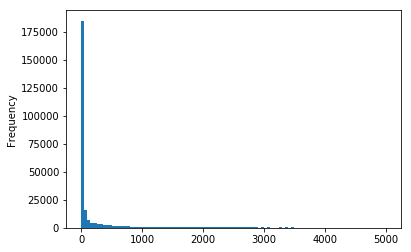

In [27]:
ips.loc[ips < 5000].plot(kind='hist', bins=100)

Not quite obvious!

In [28]:
gp_ip = train.groupby('ip')

In [29]:
ip_size = gp_ip.size()
ip_rate = gp_ip['is_attributed'].mean()

In [30]:
ip_size.corr(ip_rate)

-0.088291186312299055

In [31]:
ip_size.corr(gp_ip['is_attributed'].sum())

0.89131135225789937

Assume on one ip can have multiple people

In [13]:
test_sam = pd.read_csv('../data/test_supplement.csv')

In [14]:
test_sam.sample(5)

,click_id,ip,app,device,os,channel,click_time
54783524,54783524,95442,3,1,7,211,2017-11-10 15:03:23
37838817,37838817,114957,3,1,13,137,2017-11-10 09:43:44
52880974,52880974,55852,12,1,19,265,2017-11-10 14:27:50
46424794,46424794,91574,18,1,13,107,2017-11-10 12:27:12
51929180,51929180,108153,18,1,13,107,2017-11-10 14:10:51


Want to know new cases in test items?

In [18]:
test = pd.read_csv('../data/test.csv')

In [24]:
def count_new_items_in_test(column):
    print('Number of new items for {}'.format(column))
    return len(set(test.loc[:, column].tolist()) - set(train.loc[:, column].tolist()))

Not all ip in test are in train.

In [25]:
count_new_items_in_test('ip')

Number of new items for ip


55772

In [26]:
count_new_items_in_test('app')

Number of new items for app


24

In [27]:
count_new_items_in_test('device')

Number of new items for device


324

In [28]:
count_new_items_in_test('os')

Number of new items for os


56

In [29]:
count_new_items_in_test('channel')

Number of new items for channel


0

How many items of test rows in train?

In [34]:
seen_items = (
    test.ip.isin(train.ip.unique()).astype('int') +
    test.app.isin(train.app.unique()).astype('int') +
    test.app.isin(train.device.unique()).astype('int') +
    test.os.isin(train.os.unique())
)

In [35]:
# all channels been seen
seen_items += 1

In [36]:
seen_items.value_counts()

5    15139758
4     3441271
3      208103
2        1337
dtype: int64